<a href="https://colab.research.google.com/github/KesteHarshada87/MachineLearning/blob/main/KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

# Expanded dataset with 20 samples
data = {
    'Age': [25, 45, 30, 22, 35, 40, 28, 33, 50, 29, 42, 37, 26, 48, 31, 24, 38, 27, 44, 36],
    'Income': [50000, 64000, 58000, 48000, 62000, 70000, 55000, 60000, 72000, 57000,
               66000, 61000, 52000, 69000, 59000, 53000, 64000, 56000, 68000, 60000],
    'Years_Experience': [2, 10, 5, 1, 7, 9, 3, 6, 12, 4, 8, 7, 2, 11, 5, 2, 9, 3, 10, 6],
    'Education_Level': ['Bachelor', 'Master', 'Bachelor', 'High School', 'Master', 'PhD', 'Bachelor',
                        'Master', 'PhD', 'Bachelor', 'Master', 'Bachelor', 'High School', 'PhD', 'Bachelor',
                        'High School', 'Master', 'Bachelor', 'PhD', 'Master'],
    'City': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Chicago', 'Houston', 'Boston',
             'Seattle', 'Houston', 'Boston', 'Los Angeles', 'Seattle', 'New York', 'Houston',
             'Chicago', 'Boston', 'Seattle', 'New York', 'Houston', 'Chicago'],
    'Class': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes',
              'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes']
}

# Create DataFrame
df = pd.DataFrame(data)

print(df)



    Age  Income  Years_Experience Education_Level         City Class
0    25   50000                 2        Bachelor     New York   Yes
1    45   64000                10          Master  Los Angeles    No
2    30   58000                 5        Bachelor      Chicago   Yes
3    22   48000                 1     High School     New York    No
4    35   62000                 7          Master      Chicago   Yes
5    40   70000                 9             PhD      Houston    No
6    28   55000                 3        Bachelor       Boston   Yes
7    33   60000                 6          Master      Seattle    No
8    50   72000                12             PhD      Houston    No
9    29   57000                 4        Bachelor       Boston   Yes
10   42   66000                 8          Master  Los Angeles    No
11   37   61000                 7        Bachelor      Seattle   Yes
12   26   52000                 2     High School     New York    No
13   48   69000                11 

In [13]:
numerical_cols = ['Age', 'Income', 'Years_Experience']
categorical_cols = ['Education_Level', 'City']
target_col = 'Class'



In [14]:
df_encoded = pd.get_dummies(df, columns=categorical_cols)


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform only the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [16]:
df_encoded[target_col] = df_encoded[target_col].map({'Yes': 1, 'No': 0})


In [17]:
print(df_encoded.head())


        Age    Income  Years_Experience  Class  Education_Level_Bachelor  \
0 -1.168043 -1.543684         -1.253993      1                      True   
1  1.290994  0.575098          1.192822      0                     False   
2 -0.553283 -0.332951         -0.336437      1                      True   
3 -1.536898 -1.846367         -1.559845      0                     False   
4  0.061476  0.272415          0.275267      1                     False   

   Education_Level_High School  Education_Level_Master  Education_Level_PhD  \
0                        False                   False                False   
1                        False                    True                False   
2                        False                   False                False   
3                         True                   False                False   
4                        False                    True                False   

   City_Boston  City_Chicago  City_Houston  City_Los Angeles  City_N

In [18]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop(columns=['Class'])  # All columns except target
y = df_encoded['Class']                 # Target column

# Split the data: 80% train, 20% test (you can adjust test size)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


K=1, Accuracy=0.5000
K=2, Accuracy=0.5000
K=3, Accuracy=0.7500
K=4, Accuracy=0.5000
K=5, Accuracy=0.7500
K=6, Accuracy=0.5000
K=7, Accuracy=0.2500
K=8, Accuracy=0.2500
K=9, Accuracy=0.2500
K=10, Accuracy=0.2500
K=11, Accuracy=0.2500
K=12, Accuracy=0.2500
K=13, Accuracy=0.2500
K=14, Accuracy=0.5000
K=15, Accuracy=0.5000
K=16, Accuracy=0.5000

Optimal K found: 3 with accuracy: 0.7500


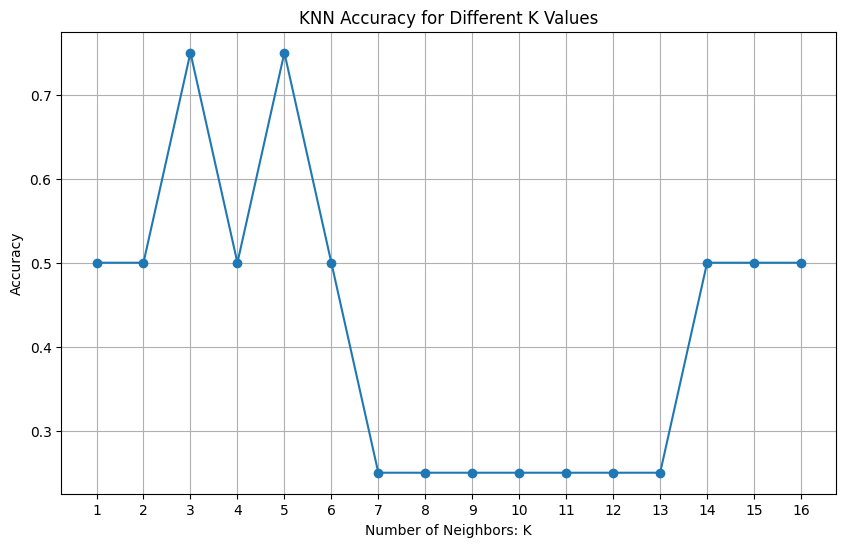

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

max_k = min(20, len(X_train))  # K can't be larger than training samples
accuracies = []

for k in range(1, max_k + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.4f}")

optimal_k = accuracies.index(max(accuracies)) + 1
print(f"\nOptimal K found: {optimal_k} with accuracy: {max(accuracies):.4f}")

# Plot accuracy vs K value
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), accuracies, marker='o')
plt.title('KNN Accuracy for Different K Values')
plt.xlabel('Number of Neighbors: K')
plt.ylabel('Accuracy')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()




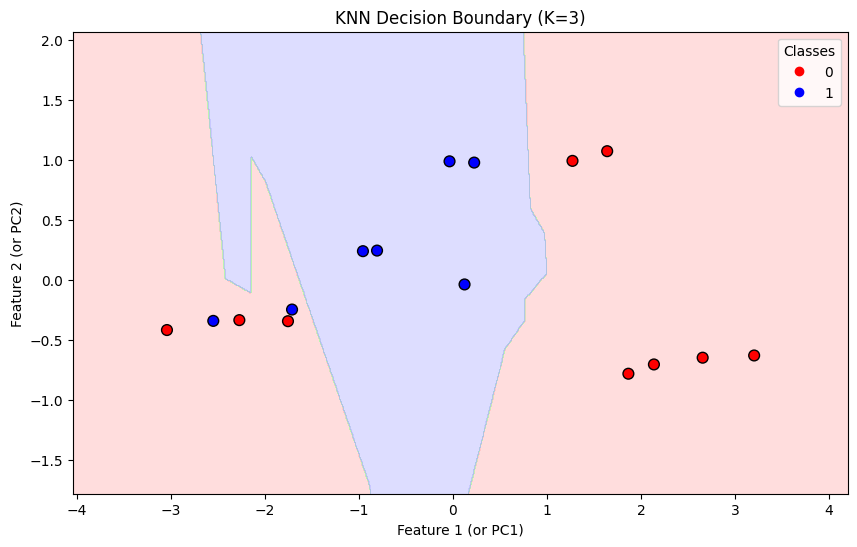

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# Reduce features to 2D if needed
if X_train.shape[1] > 2:
    pca = PCA(n_components=2)
    X_train_2d = pca.fit_transform(X_train)
    X_test_2d = pca.transform(X_test)
else:
    X_train_2d = X_train
    X_test_2d = X_test

# Train KNN with optimal K on 2D data
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_2d, y_train)

# Create meshgrid for decision boundary visualization
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class for each point on the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and training points
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # background colors
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])   # training points colors

plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=60)

plt.xlabel('Feature 1 (or PC1)')
plt.ylabel('Feature 2 (or PC2)')
plt.title(f"KNN Decision Boundary (K={optimal_k})")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


Accuracy of best KNN model (K=3): 0.7500


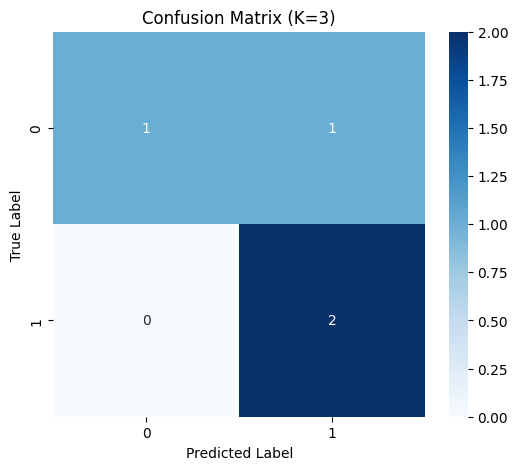

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train the best KNN model with optimal_k
best_knn = KNeighborsClassifier(n_neighbors=optimal_k)
best_knn.fit(X_train, y_train)

# Predict on test set
y_pred = best_knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of best KNN model (K={optimal_k}): {accuracy:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix (K={optimal_k})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
